In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get update -qq
!apt-get install -qq fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 등록
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()


Selecting previously unselected package fonts-nanum.
(Reading database ... 122541 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

# 강우량 파일 리스트
rainfall_files = [
    "서울시_강우량_정보_2022년07월.csv",
    "서울시_강우량_정보_2022년08월.csv",
    "서울시_강우량_정보_2022년09월.csv",
    "서울시_강우량_정보_2022년10월.csv",
    "서울시_강우량_정보_2022년11월.csv",
    "서울시_강우량_정보_2022년12월.csv"
]

# 강우량 데이터 로드 및 병합
rainfall_data = pd.concat([pd.read_csv(file, encoding='cp949', parse_dates=['자료수집 시각']) for file in rainfall_files])

# 대여건수 파일
bicycle_file = "서울특별시 공공자전거 일별 대여건수_22.07-22.12.csv"

# 자전거 대여 데이터 로드
bicycle_data = pd.read_csv(bicycle_file, encoding='cp949', parse_dates=['대여일시'])

# 인덱스 재설정
bicycle_data = bicycle_data.reset_index(drop=True)
rainfall_data = rainfall_data.reset_index(drop=True)

# 날짜 형식 변환 (강우량 데이터와 자전거 대여 데이터를 날짜 기준으로 병합하기 위해)
bicycle_data['대여일시'] = pd.to_datetime(bicycle_data['대여일시'], format='%Y-%m-%d')
rainfall_data['자료수집 시각'] = pd.to_datetime(rainfall_data['자료수집 시각'], format='%Y-%m-%d %H:%M')

# 날짜별 강우량과 대여건수를 병합
merged_data = pd.merge(bicycle_data, rainfall_data, left_on=bicycle_data['대여일시'].dt.date, right_on=rainfall_data['자료수집 시각'].dt.date, how='inner')

# 결측값 처리
merged_data = merged_data.dropna(subset=['10분우량'])




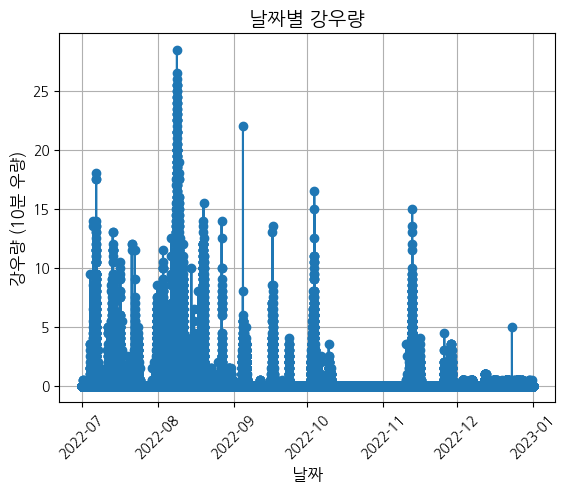

In [5]:
# 날짜별 강우량 그래프
plt.plot(merged_data['자료수집 시각'], merged_data['10분우량'], 'o-')
plt.xlabel('날짜', fontsize=12)
plt.ylabel('강우량 (10분 우량)', fontsize=12)
plt.title('날짜별 강우량', fontsize=14)
plt.xticks(rotation=45)  # x축 눈금 라벨 회전
plt.grid(True)

plt.show()


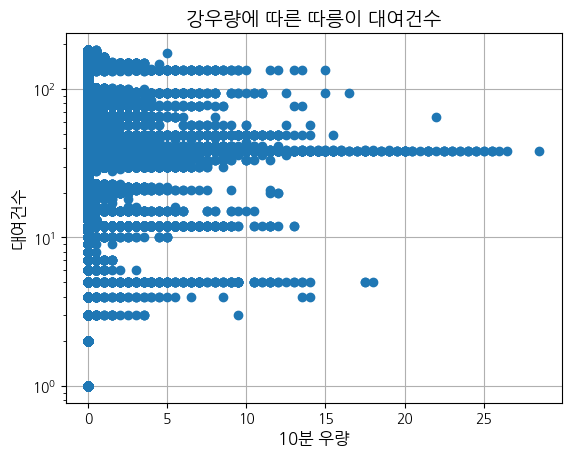

In [8]:
# 그래프 그리기
plt.plot(merged_data['10분우량'], merged_data['대여건수'], 'o')
plt.xlabel('10분 우량', fontsize=12)
plt.ylabel('대여건수', fontsize=12)
plt.title('강우량에 따른 따릉이 대여건수', fontsize=14)
plt.grid(True)

# y축 로그 스케일 설정
plt.yscale('log')

plt.show()


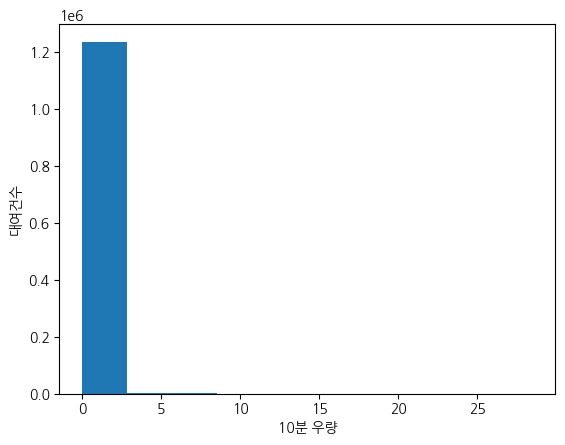

In [29]:
plt.hist(merged_data['10분우량'], bins=10)
plt.xlabel('10분 우량')
plt.ylabel('대여건수')
plt.show()


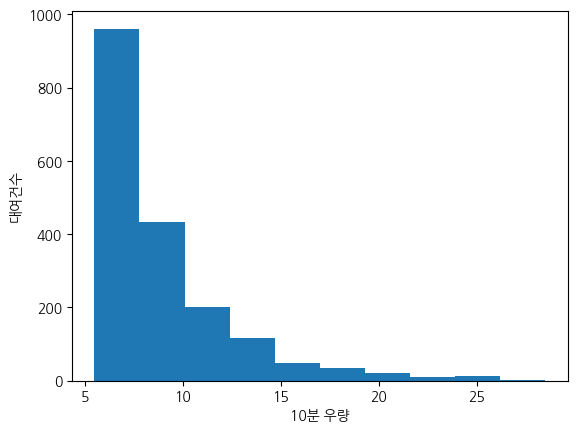

In [31]:
# 10분 우량이 0이 아닌 데이터만 필터링
filtered_data = merged_data[merged_data['10분우량'] > 5]

# 히스토그램 그리기
plt.hist(filtered_data['10분우량'], bins=10)
plt.xlabel('10분 우량')
plt.ylabel('대여건수')
plt.show()


# 새 섹션